# Лабораторная работа 9

# Обход бинарного дерева поиска. Поиск максимального и минимального значений

Ковалевская В.С., 12. 05. 2022

## Задание 9.1 (Центрированный обход бинарного дерева поиска)

$\color{red}{Доопределите}$ $\color{red}{или}$ $\color{red}{переопределите}$ классы BinaryTree, BinaryNode, EmptyNode из Лабораторной работы 8 за счет определения нового метода lcr(self), реализующего центрированный обход бинарного дерева поиска. Рекомендации по выполнению представлены в лекции к теме Бинарное дерево поиска. Реализация на основе ООП.

Результатом вызова метода lcr для экземпляра класса BinaryTree должен быть список значений вершин дерева, отсортированных по возрастанию.

$\color{red}{Создайте}$ список source_data из $10^3$ случайных чисел, равномерно распределенных на отрезке $[0, 100]$. 

$\color{red}{Постройте}$ бинарное дерево поиска по списку случайных чисел и $\color{red}{выполните}$ центрированный обход дерева с помощью метода lcr.

$\color{red}{Изобразите}$ график по точкам, ординаты которых заданы списком source_data. В этой же графической области $\color{red}{изобразите}$ график по точкам, коодинаты которых заданы списком, результатом центрированного обхода бинарного дерева поиска.

### Выполнение Задания 9.1

Центрированный обход бинарного дерева поиска реализует сортировку по возрастанию числовой последовательности, записанной в виде дерева.

Реализацию центрированного обхода осуществим с помощью метода lcr для трех классов BinaryTree, EmptyNode, BinaryNode.

In [81]:
class BinaryTree:
    def __init__(self): # метод инициализации, вызывается без аргументов
        self.root = EmptyNode() # инициализирует единственный атрибут экземпляра класса root экземпляром класса EmptyNode, назначение атрибута root -- это хранение ссылки на корень дерева
        BinaryNode.count = 0   # при создании класса атрибут count инициализируется значением 0
        
    def __repr__(self): # метод строкового представления
        return repr(self.root) # возвращает строковое представление для корня дерева root
        
    def insert(self, value): # метод вставки в дерево нового элемента
        self.root = self.root.insert(value) # новый элемент является листом со значением value            
        
    def __contains__(self, value):
        return value in self.root   # возвращаем результат вызова операции in для корневой вершины
    
    def __len__(self):
        return len(self.root)     # вызывает функцию len для корневой вершины
    
    def lcr(self):
        return self.root.lcr()    # метод lcr класса BinaryTree вызывает метод lcr для корневой вершины

In [82]:
class EmptyNode:        
    def __repr__(self):         # метод строкового представления
        return "*"              # возвращает символ *
    
    def insert(self, value):    # метод вставки в пустую вершину новой вершины со значением value
        return BinaryNode(self, value, self) # возвращаем новый экземпляр класса BinaryNode со значением value
    
    def __contains__(self, value):
        return False            # метод __contains__ класса EmptyNode возвращает False
    
    def __len__(self):
        return 0              # возвращаем 0
    
    def lcr(self):
        return []              # метод lcr класса EmptyNode возвращает пустой список

In [83]:
class BinaryNode:
    def __init__(self, left, value, right): # Метод инициализации экземпляра класса для инициализации одноименных атрибутов экземпляра класса left, value и right соответствующими значениями
        self.left = left                    # left - хранение ссылки на корень левого поддерева
        self.value = value                  # value - хранение значения вершины
        self.right = right                  # right - хранение ссылки на корень правого поддерева
        BinaryNode.count += 1               # при создании экземпляра класса значение атрибута count увеличивается на 1
        
    def __repr__(self): # Метод строкового представления экземпляра класса __repr__ возвращает кортеж
        return "(%s, %s, %s)" % (repr(self.left), repr(self.value), repr(self.right))
    
    def insert(self, value):   # метод вставки в текущую вершину новой вершины value
        if value < self.value: #если value<self.value, то вызывается метод insert(value) для левого поддерева
            self.left = self.left.insert(value)
            return self 
        else:
            self.right = self.right.insert(value) # если value>=self.value, то вызывается метод insert(value) для правого поддерева
            return self 
        
    def __contains__(self, value):      # проверяемое значение value сравнивается со значением корневой вершины self.value
        if value == self.value:         # если value==self.value, то возвращается True
            return True
        elif value < self.value:        # если value<self.value, то возвращается результат вызова операции in для корня левого поддерева
            return (value in self.left)
        else:
            return (value in self.right) # если value>self.value, возвращается результат вызова операции in для корня правого поддерева
        
    def __len__(self):            # метод __len__ класса BinaryNode возвращает значение атрибута count класса BinaryNode
        return self.count         # атрибут count используется как счетчик созданных экземпляров класса BinaryNode
    
    def lcr(self):
        result = []                #  создали список, он формируется на основе вызова метода lcr для левого поддерева и правого поддерева
        result = self.left.lcr() + [self.value] + self.right.lcr()  # осуществляем конкатенацию по правилу центрирования
        return result              

In [84]:
source_data = [6, 4, 9, 12, 1, 2,1, 89, 54, 3]
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [85]:
tree

(((*, 1, ((*, 1, *), 2, (*, 3, *))), 4, *), 6, (*, 9, (*, 12, ((*, 54, *), 89, *))))

In [86]:
sorted_data = tree.lcr()

sorted_data

[1, 1, 2, 3, 4, 6, 9, 12, 54, 89]

In [87]:
import matplotlib.pyplot as plt

In [88]:
import random as rnd

In [89]:
source_data = [rnd.uniform(0,100) for _ in range(10**3)]

In [90]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [91]:
sorted_data = tree.lcr()

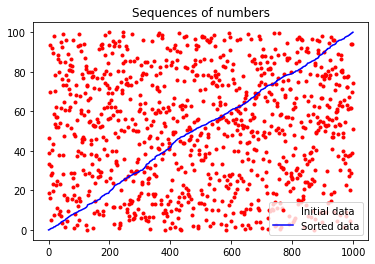

In [92]:
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,color='blue',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

In [93]:
source_data = [rnd.uniform(0,100) for _ in range(10**5)]

In [94]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [95]:
sorted_data = tree.lcr()

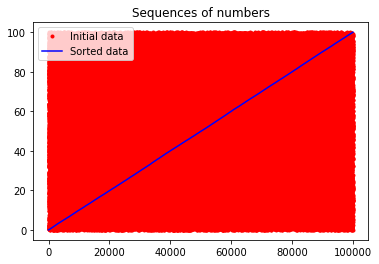

In [96]:
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,color='b',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 9.2 (Нахождение минимального и максимального значения)

$\color{red}{Доопределите}$ $\color{red}{или}$ $\color{red}{переопределите}$ классы BinaryTree, BinaryNode, EmptyNode за счет определения метода min(self) и max(self) для нахождения минимального и максимального значений в дереве, соответственно. Рекомендации по выполнению представлены в лекции к теме Бинарное дерево поиска. Реализация на основе ООП.

$\color{red}{Протестируйте}$ корректность выполнения методов min и max для ранее созданного дерева tree.

In [97]:
class BinaryTree:
    def __init__(self): # метод инициализации, вызывается без аргументов
        self.root = EmptyNode() # инициализирует единственный атрибут экземпляра класса root экземпляром класса EmptyNode, назначение атрибута root -- это хранение ссылки на корень дерева
        BinaryNode.count = 0   # при создании класса атрибут count инициализируется значением 0
        
    def __repr__(self): # метод строкового представления
        return repr(self.root) # возвращает строковое представление для корня дерева root
        
    def insert(self, value): # метод вставки в дерево нового элемента
        self.root = self.root.insert(value) # новый элемент является листом со значением value            
        
    def __contains__(self, value):
        return value in self.root   # возвращаем результат вызова операции in для корневой вершины
    
    def __len__(self):
        return len(self.root)     # вызывает функцию len для корневой вершины
    
    def lcr(self):
        return self.root.lcr()    # метод lcr класса BinaryTree вызывает метод lcr для корневой вершины
    
    def min(self):
        return self.root.min()    #  метод min класса BinaryTree вызывает метод min для корневой вершины

In [98]:
class EmptyNode:        
    def __repr__(self):         # метод строкового представления
        return "*"              # возвращает символ *
    
    def insert(self, value):    # метод вставки в пустую вершину новой вершины со значением value
        return BinaryNode(self, value, self) # возвращаем новый экземпляр класса BinaryNode со значением value
    
    def __contains__(self, value):
        return False            # метод __contains__ класса EmptyNode возвращает False
    
    def __len__(self):
        return 0              # возвращаем 0
    
    def lcr(self):
        return []              # метод lcr класса EmptyNode возвращает пустой список
    
    def min(self):
        return None           # метод min класса EmptyNode возвращает None

In [99]:
class BinaryNode:
    def __init__(self, left, value, right): # Метод инициализации экземпляра класса для инициализации одноименных атрибутов экземпляра класса left, value и right соответствующими значениями
        self.left = left                    # left - хранение ссылки на корень левого поддерева
        self.value = value                  # value - хранение значения вершины
        self.right = right                  # right - хранение ссылки на корень правого поддерева
        BinaryNode.count += 1               # при создании экземпляра класса значение атрибута count увеличивается на 1
        
    def __repr__(self): # Метод строкового представления экземпляра класса __repr__ возвращает кортеж
        return "(%s, %s, %s)" % (repr(self.left), repr(self.value), repr(self.right))
    
    def insert(self, value):   # метод вставки в текущую вершину новой вершины value
        if value < self.value: #если value<self.value, то вызывается метод insert(value) для левого поддерева
            self.left = self.left.insert(value)
            return self 
        else:
            self.right = self.right.insert(value) # если value>=self.value, то вызывается метод insert(value) для правого поддерева
            return self 
        
    def __contains__(self, value):      # проверяемое значение value сравнивается со значением корневой вершины self.value
        if value == self.value:         # если value==self.value, то возвращается True
            return True
        elif value < self.value:        # если value<self.value, то возвращается результат вызова операции in для корня левого поддерева
            return (value in self.left)
        else:
            return (value in self.right) # если value>self.value, возвращается результат вызова операции in для корня правого поддерева
        
    def __len__(self):            # метод __len__ класса BinaryNode возвращает значение атрибута count класса BinaryNode
        return self.count         # атрибут count используется как счетчик созданных экземпляров класса BinaryNode
    
    def lcr(self):
        result = []                #  создали список, он формируется на основе вызова метода lcr для левого поддерева и правого поддерева
        result = self.left.lcr() + [self.value] + self.right.lcr()  # осуществляем конкатенацию по правилу центрирования
        return result              
    
    def min(self):
        if isinstance(self.left, EmptyNode):    # если левое поддерево является пустой вершиной (экземпляром класса  EmptyNode)
            return self.value                   # возвращаем self.value 
        else:                                   # левое поддерево не является пустой вершиной
            return self.left.min()              # вызываем метод min для корня левого поддерева

In [100]:
tree = BinaryTree()

tree

*

In [101]:
print(tree.min())

None


In [102]:
tree.insert(5)
tree

(*, 5, *)

In [103]:
tree.min()

5

In [104]:
tree.insert(2)
tree

((*, 2, *), 5, *)

In [105]:
tree.min()

2

In [106]:
tree.insert(11)
tree.insert(4)
tree.insert(1)
tree

(((*, 1, *), 2, (*, 4, *)), 5, (*, 11, *))

In [107]:
tree.min()

1

In [108]:
source_data = [rnd.uniform(0,100) for _ in range(10**3)]
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [109]:
tree.min()

0.29214393789881443

In [110]:
sorted_data = tree.lcr()

sorted_data[0]

0.29214393789881443

In [111]:
class BinaryTree:
    def __init__(self): # метод инициализации, вызывается без аргументов
        self.root = EmptyNode() # инициализирует единственный атрибут экземпляра класса root экземпляром класса EmptyNode, назначение атрибута root -- это хранение ссылки на корень дерева
        BinaryNode.count = 0   # при создании класса атрибут count инициализируется значением 0
        
    def __repr__(self): # метод строкового представления
        return repr(self.root) # возвращает строковое представление для корня дерева root
        
    def insert(self, value): # метод вставки в дерево нового элемента
        self.root = self.root.insert(value) # новый элемент является листом со значением value            
        
    def __contains__(self, value):
        return value in self.root   # возвращаем результат вызова операции in для корневой вершины
    
    def __len__(self):
        return len(self.root)     # вызывает функцию len для корневой вершины
    
    def lcr(self):
        return self.root.lcr()    # метод lcr класса BinaryTree вызывает метод lcr для корневой вершины
    
    def min(self):
        return self.root.min()    #  метод min класса BinaryTree вызывает метод min для корневой вершины
    
    def max(self):
        return self.root.max()    #  метод max класса BinaryTree вызывает метод max для корневой вершины

In [112]:
class EmptyNode:        
    def __repr__(self):         # метод строкового представления
        return "*"              # возвращает символ *
    
    def insert(self, value):    # метод вставки в пустую вершину новой вершины со значением value
        return BinaryNode(self, value, self) # возвращаем новый экземпляр класса BinaryNode со значением value
    
    def __contains__(self, value):
        return False            # метод __contains__ класса EmptyNode возвращает False
    
    def __len__(self):
        return 0              # возвращаем 0
    
    def lcr(self):
        return []              # метод lcr класса EmptyNode возвращает пустой список
    
    def min(self):
        return None           # метод min класса EmptyNode возвращает None
    
    def max(self):
        return None           # метод max класса EmptyNode возвращает None

In [113]:
class BinaryNode:
    def __init__(self, left, value, right): # Метод инициализации экземпляра класса для инициализации одноименных атрибутов экземпляра класса left, value и right соответствующими значениями
        self.left = left                    # left - хранение ссылки на корень левого поддерева
        self.value = value                  # value - хранение значения вершины
        self.right = right                  # right - хранение ссылки на корень правого поддерева
        BinaryNode.count += 1               # при создании экземпляра класса значение атрибута count увеличивается на 1
        
    def __repr__(self): # Метод строкового представления экземпляра класса __repr__ возвращает кортеж
        return "(%s, %s, %s)" % (repr(self.left), repr(self.value), repr(self.right))
    
    def insert(self, value):   # метод вставки в текущую вершину новой вершины value
        if value < self.value: #если value<self.value, то вызывается метод insert(value) для левого поддерева
            self.left = self.left.insert(value)
            return self 
        else:
            self.right = self.right.insert(value) # если value>=self.value, то вызывается метод insert(value) для правого поддерева
            return self 
        
    def __contains__(self, value):      # проверяемое значение value сравнивается со значением корневой вершины self.value
        if value == self.value:         # если value==self.value, то возвращается True
            return True
        elif value < self.value:        # если value<self.value, то возвращается результат вызова операции in для корня левого поддерева
            return (value in self.left)
        else:
            return (value in self.right) # если value>self.value, возвращается результат вызова операции in для корня правого поддерева
        
    def __len__(self):            # метод __len__ класса BinaryNode возвращает значение атрибута count класса BinaryNode
        return self.count         # атрибут count используется как счетчик созданных экземпляров класса BinaryNode
    
    def lcr(self):
        result = []                #  создали список, он формируется на основе вызова метода lcr для левого поддерева и правого поддерева
        result = self.left.lcr() + [self.value] + self.right.lcr()  # осуществляем конкатенацию по правилу центрирования
        return result              
    
    def min(self):
        if isinstance(self.left, EmptyNode):    # если левое поддерево является пустой вершиной (экземпляром класса  EmptyNode)
            return self.value                   # возвращаем self.value 
        else:                                   # левое поддерево не является пустой вершиной
            return self.left.min()              # вызываем метод min для корня левого поддерева
        
    def max(self):
        if isinstance(self.right, EmptyNode):    # если правое поддерево является пустой вершиной (экземпляром класса  EmptyNode)
            return self.value                   # возвращаем self.value 
        else:                                   # правое поддерево не является пустой вершиной
            return self.right.max()              # вызываем метод max для корня правого поддерева

In [114]:
tree = BinaryTree()

In [115]:
tree

*

In [116]:
print(tree.max())

None


In [117]:
tree.insert(5)
tree

(*, 5, *)

In [118]:
tree.max()

5

In [119]:
tree.insert(7)
tree

(*, 5, (*, 7, *))

In [120]:
tree.max()

7

In [121]:
source_data1 = [5,1,10,3,4, 12, 56]
for i in source_data1:
    tree.insert(i)
    
tree

((*, 1, (*, 3, (*, 4, *))), 5, ((*, 5, *), 7, (*, 10, (*, 12, (*, 56, *)))))

In [122]:
tree.max()

56

In [123]:
source_data = [rnd.uniform(0,100) for _ in range(10**3)]
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [124]:
tree.max()

99.8946562593087

In [125]:
sorted_data = tree.lcr()

sorted_data[-1]

99.8946562593087

## Задание 9.3 (Создание модуля)

$\color{red}{Напишите}$ модуль binaryTree.py на основе созданных классов.

$\color{red}{Напишите}$ строки документации для классов BinaryTree, BinaryNode, EmptyNode и для каждого метода классов.

$\color{red}{Протестируйте}$ работу созданного модуля на примерах.

In [126]:
import binaryTree

In [127]:
import matplotlib.pyplot as plt

In [128]:
import random as rnd

In [129]:
source_data = [rnd.uniform(0,100) for i in range(10**3)]

In [130]:
tree = binaryTree.BinaryTree()
for i in source_data:
    tree.insert(i)

In [131]:
len(tree)

1000

In [132]:
tree.min()

0.2833879352038382

In [133]:
tree.max()

99.79561752890433

In [134]:
sorted_data = tree.lcr()

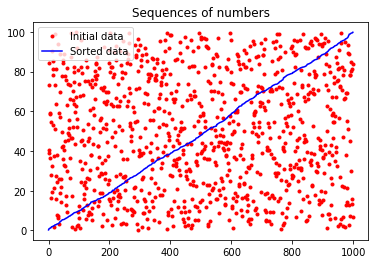

In [135]:
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,color='blue',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

In [136]:
source_data = [6, 4, 9, 12, 1, 2,1, 89, 54, 3]
tree = binaryTree.BinaryTree()
for i in source_data:
    tree.insert(i)

In [137]:
len(tree), tree.min(), tree.max()

(10, 1, 89)

In [138]:
tree

(((*, 1, ((*, 1, *), 2, (*, 3, *))), 4, *), 6, (*, 9, (*, 12, ((*, 54, *), 89, *))))

In [139]:
sorted_data = tree.lcr()

sorted_data

[1, 1, 2, 3, 4, 6, 9, 12, 54, 89]

In [140]:
?tree

Type:           BinaryTree
String form:    (((*, 1, ((*, 1, *), 2, (*, 3, *))), 4, *), 6, (*, 9, (*, 12, ((*, 54, *), 89, *))))
Length:         10
File:           c:\users\user\documents\km2\binarytree.py
Docstring:     
Класс BinaryTree определяет шаблон для создания объекта, представляющего бинарное дерево поиска
    
Init docstring:
Метод инициализации экземпляра класса init вызывается без аргументов и инициализирует единственный атрибут экземпляра класса root экземпляром класса EmptyNode
        


In [141]:
binaryTree.BinaryNode?

Init signature: binaryTree.BinaryNode(left, value, right)
Docstring:     
Класс BinaryNode определяет шаблон для создания объекта, представляющего элемент бинарного дерева поиска

Определение класса BinaryNode содержит ТРИ метода: init, repr и insert.
    
Init docstring:
Метод инициализации экземпляра класса вызывается с тремя аргументами left, value и right для инициализации одноименных атрибутов экземпляра класса left, value и right соответствующими значениями
        
File:           c:\users\user\documents\km2\binarytree.py
Type:           type
Subclasses:     


In [142]:
binaryTree.BinaryNode.__doc__

'Класс BinaryNode определяет шаблон для создания объекта, представляющего элемент бинарного дерева поиска\n\nОпределение класса BinaryNode содержит ТРИ метода: init, repr и insert.\n    '

In [143]:
binaryTree.BinaryNode.min?

Signature: binaryTree.BinaryNode.min(self)
Docstring:
Метод min класса BinaryNode анализирует только левое поддерево для экземпляра класса BinaryNode

Returns: self.value, если левое поддерево является пустой вершиной (экземпляром класса  EmptyNode),
иначе - вызываем метод min для корня левого поддерева
File:      c:\users\user\documents\km2\binarytree.py
Type:      function


In [144]:
binaryTree.BinaryNode.min.__doc__

'Метод min класса BinaryNode анализирует только левое поддерево для экземпляра класса BinaryNode\n        \n        Returns: self.value, если левое поддерево является пустой вершиной (экземпляром класса  EmptyNode),\n        иначе - вызываем метод min для корня левого поддерева\n        '

In [145]:
binaryTree.BinaryNode.lcr.__doc__

'Метод lcr класса BinaryNode возвращает список значений вершин, соответствующих центрированному обходу дерева с корнем self.value для экземпляра класса BinaryNode. \n        \n        Returns: результирующий список, который формируется на основе вызова метода lcr для левого поддерева self.left и правого поддерева self.right (осуществляет конкатенацию списков по правилу центрированного обхода)\n        '

In [146]:
binaryTree.BinaryNode.lcr?

Signature: binaryTree.BinaryNode.lcr(self)
Docstring:
Метод lcr класса BinaryNode возвращает список значений вершин, соответствующих центрированному обходу дерева с корнем self.value для экземпляра класса BinaryNode. 

Returns: результирующий список, который формируется на основе вызова метода lcr для левого поддерева self.left и правого поддерева self.right (осуществляет конкатенацию списков по правилу центрированного обхода)
File:      c:\users\user\documents\km2\binarytree.py
Type:      function
